**Name** |  Jomarie Dupaya<br>
**Section** | CPE32S3<BR>
**Date Performed**: | 2/3/2024<BR>
**Date Submitted**: | 2/3/2024<BR>
**Instructor**: | Engr. Roman M. Richard

**Title:** Banana Quality<br>
**Link To Origin of the Dataset:** https://www.kaggle.com/datasets/l3llff/banana/data <br>
**Link to Spreadsheet Dataset:**https://docs.google.com/spreadsheets/d/16FdIZE2I35vgcOtTnyA8mA-IMvdjWJH_VFErJhDr79E/edit?usp=sharing <br>

Based on the found dataset the problem I am trying to solve is to know the quality of the banana based on the different features of the fruit.<br>

On this assignment I will perform both of the MLP using SKlearn MLPClassifier and TensorFlow keras, for benchmarking.

#**MultiLayer Perceptron Using Sklearn**

#####**Loading, processing, and cleaning the data for the 1st model**

In [554]:
#Import and load the dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
banana = pd.read_csv("/content/banana_quality.csv")
print(banana.columns)

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')


In [555]:
banana.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [556]:
banana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [557]:
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
banana['Quality']=le.fit_transform(banana['Quality'])

In [558]:
banana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 500.1 KB


In [559]:
banana.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725,0.500750
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467,0.500031
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977,0.000000
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450,0.000000
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735,1.000000
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063,1.000000
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633,1.000000


**Remarks:** The data is checked, verified, and columns filled with data that will be used for the model.

#####**Implementing Feature Importance**

In [ ]:
#Separate features and target variable
X = banana.drop(['Acidity', 'Quality','Sweetness', 'Size'], axis=1)
y = banana['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature importance
#Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#Get feature importances
feature_importances = rf.feature_importances_

#Create DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature importance:")
print(feature_importance_df)

Feature importance:
       Feature  Importance
2  HarvestTime    0.292866
0       Weight    0.261915
1     Softness    0.226521
3     Ripeness    0.218698


**Remarks:** Using random forest classifier to get the feature importance of the dataset to limit the data that will used to connect with the target variable which will can improve the modelling.

#####**Removing Outliers**

In [ ]:
#Remove Outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
outliers = (X < (Q1 - threshold)) | (X > (Q3 + threshold))
cleaned_df = X[~outliers.any(axis=1)]

#2nd Outlier removal
Q1_2 = cleaned_df.quantile(0.25)
Q3_2 = cleaned_df.quantile(0.75)
IQR_2 = Q3_2 - Q1_2
threshold_2 = 1.5 * IQR_2
outliers_2 = (cleaned_df < (Q1_2 - threshold_2)) | (cleaned_df > (Q3_2 + threshold_2))
cleaned_df2 = cleaned_df[~outliers_2.any(axis=1)]

In [ ]:
cleaned_df2.describe()

,Weight,Softness,HarvestTime,Ripeness
count,7859.000000,7859.000000,7859.000000,7859.000000
mean,-0.742800,-0.028938,-0.780937,0.823255
std,2.009928,2.058572,1.937883,2.050002
min,-6.609340,-6.290912,-6.002344,-4.749013
25%,-2.215542,-1.618966,-2.127844,-0.534235
50%,-0.848095,0.179909,-0.957602,0.986723
75%,0.796848,1.543462,0.463344,2.276937
max,5.184198,6.124278,4.333418,6.490461


**Remarks:** Processing and removing some of the outliers, to lessen the difference of the 75% and maximum count of the dataframe to improve the performance and reliability of data.

#####**Standardizing the Data**

In [ ]:
#Standardized the data
scaler = StandardScaler()
scaleddf = scaler.fit_transform(cleaned_df2)
pd.DataFrame(scaleddf, columns=cleaned_df2.columns).describe()

,Weight,Softness,HarvestTime,Ripeness
count,7.859000e+03,7859.000000,7.859000e+03,7.859000e+03
mean,-5.786326e-17,0.000000,8.679489e-17,-5.786326e-17
std,1.000064e+00,1.000064,1.000064e+00,1.000064e+00
min,-2.918967e+00,-3.042095,-2.694559e+00,-2.718350e+00
25%,-7.327807e-01,-0.772443,-6.950850e-01,-6.622321e-01
50%,-5.239083e-02,0.101459,-9.116975e-02,7.974532e-02
75%,7.660702e-01,0.763879,6.421232e-01,7.091577e-01
max,2.949049e+00,2.989260,2.639314e+00,2.764664e+00


**Remarks:** Cleaning and processing more of the data to bring all of the important features to a common scale, which will lessen the dominance of the features during model training.

#####**Normalizing the Data**

In [ ]:
#Normalized the data
min_max_scaler = MinMaxScaler()
normalized_X = min_max_scaler.fit_transform(scaleddf)
pd.DataFrame(normalized_X, columns=cleaned_df2.columns).describe()

,Weight,Softness,HarvestTime,Ripeness
count,7859.000000,7859.000000,7859.000000,7859.000000
mean,0.497437,0.504380,0.505179,0.495777
std,0.170426,0.165811,0.187493,0.182393
min,0.000000,0.000000,0.000000,0.000000
25%,0.372560,0.376309,0.374863,0.374998
50%,0.488509,0.521202,0.488086,0.510321
75%,0.627987,0.631031,0.625565,0.625114
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
print("Shape of normalized_X:", normalized_X.shape)
print("Shape of y:", y.shape)
y = y[:normalized_X.shape[0]]

Shape of normalized_X: (7859, 4)
Shape of y: (7859,)


**Remarks:** Normalizing the data to further shrink the scale of features on almost the same level which is to ensure every feature is proportional to the model training process.

#####**Creating and Training the MLPClassifier Model**

In [ ]:
#Split the cleaned and scaled/normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state=42)

#Create MLPClassifier model
clf = MLPClassifier(hidden_layer_sizes=(12, 10), max_iter=300, verbose=True)

**Remarks:** After processing and cleaning the data,it is now used to split and create the model using the MLPClassifier from SKlearn to determine if the model can learn to distinguish target quality using the features that are input to the model.

In [ ]:
# Train the model
clf.fit(X_train, y_train)

Iteration 1, loss = 0.68784842
Iteration 2, loss = 0.68442915
Iteration 3, loss = 0.68064108
Iteration 4, loss = 0.67612452
Iteration 5, loss = 0.67021507
Iteration 6, loss = 0.66200898
Iteration 7, loss = 0.64875267
Iteration 8, loss = 0.62732553
Iteration 9, loss = 0.60464666
Iteration 10, loss = 0.58439580
Iteration 11, loss = 0.56536137
Iteration 12, loss = 0.54798694
Iteration 13, loss = 0.53286170
Iteration 14, loss = 0.51949268
Iteration 15, loss = 0.50895628
Iteration 16, loss = 0.49720132
Iteration 17, loss = 0.48790579
Iteration 18, loss = 0.47970848
Iteration 19, loss = 0.47210711
Iteration 20, loss = 0.46602550
Iteration 21, loss = 0.45984001
Iteration 22, loss = 0.45484465
Iteration 23, loss = 0.45090468
Iteration 24, loss = 0.44777250
Iteration 25, loss = 0.44423884
Iteration 26, loss = 0.44222026
Iteration 27, loss = 0.44018198
Iteration 28, loss = 0.43833434
Iteration 29, loss = 0.43756500
Iteration 30, loss = 0.43554702
Iteration 31, loss = 0.43601799
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(12, 10), max_iter=300, verbose=True)

#####**Evaluation and Validation of the Model(SKlearn)**<br>

Accuracy: 0.8825275657336726

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1120
           1       0.89      0.89      0.89      1238

    accuracy                           0.88      2358
   macro avg       0.88      0.88      0.88      2358
weighted avg       0.88      0.88      0.88      2358



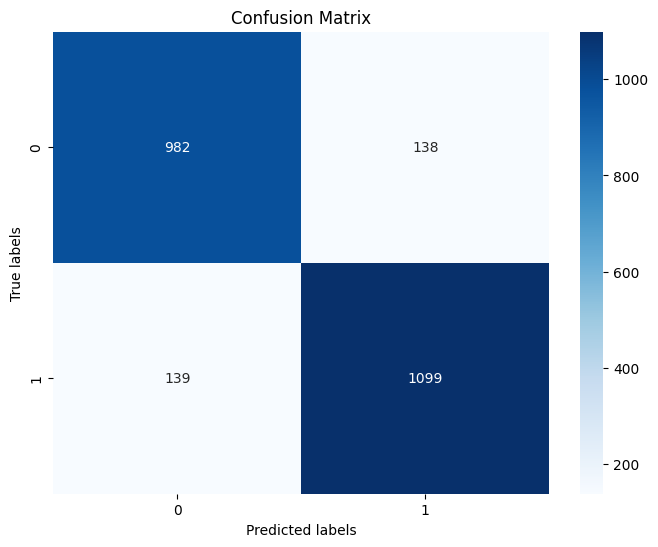

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Remarks:** After processing the model. The model can learn overtime as more iterations in the model, decreases the loss to the point that it can no longer decrease and the model stops. however upon running the model the accuracy outputed a score of around 88%, while the output of the confusion matrix show that the model did well on predicting correctly and learning from its mistakes over time.

#**MultiLayer Perceptron Using Tensorflow**

#####**Loading, processing, and cleaning the data for the 2nd model**




In [536]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [518]:
data = pd.read_csv('/content/banana_quality.csv')
data.head(5)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [519]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [520]:
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Convert string label into numbers.
data['Quality']=le.fit_transform(data['Quality'])

In [521]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 500.1 KB


#####**Implementing Feature Importance**

In [522]:
# Separate features and target variable
X = data.drop(['Acidity', 'Quality', 'Sweetness', 'Size'], axis=1)
y = data['Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature importance:")
print(feature_importance_df)

Feature importance:
       Feature  Importance
2  HarvestTime    0.290070
0       Weight    0.270018
3     Ripeness    0.221586
1     Softness    0.218326


#####**Removing Outliers**

In [523]:
# Remove outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
outliers = (X < (Q1 - threshold)) | (X > (Q3 + threshold))
cleaned_df = X[~outliers.any(axis=1)]

Q1_2 = cleaned_df.quantile(0.25)
Q3_2 = cleaned_df.quantile(0.75)
IQR_2 = Q3_2 - Q1_2
threshold_2 = 1.5 * IQR_2
outliers_2 = (cleaned_df < (Q1_2 - threshold_2)) | (cleaned_df > (Q3_2 + threshold_2))
cleaned_df2 = cleaned_df[~outliers_2.any(axis=1)]
cleaned_df2.describe()

,Weight,Softness,HarvestTime,Ripeness
count,7859.000000,7859.000000,7859.000000,7859.000000
mean,-0.742800,-0.028938,-0.780937,0.823255
std,2.009928,2.058572,1.937883,2.050002
min,-6.609340,-6.290912,-6.002344,-4.749013
25%,-2.215542,-1.618966,-2.127844,-0.534235
50%,-0.848095,0.179909,-0.957602,0.986723
75%,0.796848,1.543462,0.463344,2.276937
max,5.184198,6.124278,4.333418,6.490461


#####**Standardize features**

In [524]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cleaned_df2)
pd.DataFrame(scaled_df, columns=cleaned_df2.columns).describe()

,Weight,Softness,HarvestTime,Ripeness
count,7.859000e+03,7859.000000,7.859000e+03,7.859000e+03
mean,-5.786326e-17,0.000000,8.679489e-17,-5.786326e-17
std,1.000064e+00,1.000064,1.000064e+00,1.000064e+00
min,-2.918967e+00,-3.042095,-2.694559e+00,-2.718350e+00
25%,-7.327807e-01,-0.772443,-6.950850e-01,-6.622321e-01
50%,-5.239083e-02,0.101459,-9.116975e-02,7.974532e-02
75%,7.660702e-01,0.763879,6.421232e-01,7.091577e-01
max,2.949049e+00,2.989260,2.639314e+00,2.764664e+00


#####**Normalizing the Data**

In [525]:
# Normalize the data
min_max_scaler = MinMaxScaler()
normalized_X = min_max_scaler.fit_transform(scaled_df)
pd.DataFrame(normalized_X, columns=cleaned_df2.columns).describe()

,Weight,Softness,HarvestTime,Ripeness
count,7859.000000,7859.000000,7859.000000,7859.000000
mean,0.497437,0.504380,0.505179,0.495777
std,0.170426,0.165811,0.187493,0.182393
min,0.000000,0.000000,0.000000,0.000000
25%,0.372560,0.376309,0.374863,0.374998
50%,0.488509,0.521202,0.488086,0.510321
75%,0.627987,0.631031,0.625565,0.625114
max,1.000000,1.000000,1.000000,1.000000


**Remarks:** Simalar process as the SKlearn model, the data is first cleaned and processed for improved results, better understanding of the data, and making the data into smaller scale values.

In [547]:
num_samples_to_keep = min(normalized_X.shape[0], y_train.shape[0])

normalized_X = normalized_X[:num_samples_to_keep]
y_train = y_train[:num_samples_to_keep]

print("Shapes after alignment:")
print("Shape of input data:", normalized_X.shape)
print("Shape of labels:", y_train.shape)

Shapes after alignment:
Shape of input data: (5600, 4)
Shape of labels: (5600,)


**Remarks:** The processed data in the previous repeated codes are for variable X or features only while y or the target variable is just alligning the processed value data of X variable.

#####**Creating and Training the Tensorflow Keras Model**

In [548]:
# Creating the Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Add dropout regularization
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [549]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [550]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
140/140 [==============================] - 1s 3ms/step - loss: 0.4305 - accuracy: 0.8065 - val_loss: 0.2995 - val_accuracy: 0.8732
Epoch 2/50
140/140 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8554 - val_loss: 0.2747 - val_accuracy: 0.8848
Epoch 3/50
140/140 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8679 - val_loss: 0.2575 - val_accuracy: 0.8929
Epoch 4/50
140/140 [==============================] - 0s 3ms/step - loss: 0.3014 - accuracy: 0.8779 - val_loss: 0.2539 - val_accuracy: 0.8938
Epoch 5/50
140/140 [==============================] - 1s 4ms/step - loss: 0.2999 - accuracy: 0.8833 - val_loss: 0.2492 - val_accuracy: 0.8938
Epoch 6/50
140/140 [==============================] - 1s 4ms/step - loss: 0.2917 - accuracy: 0.8850 - val_loss: 0.2389 - val_accuracy: 0.9071
Epoch 7/50
140/140 [==============================] - 1s 4ms/step - loss: 0.2848 - accuracy: 0.8879 - val_loss: 0.2327 - val_accuracy: 0.9125
Epoch 

**Remarks:** After creating and training the model I noticed that my output is still learning for in more iterations however the accuracy overtime will almost stop after a few more epochs as the accuracy value is going smaller increased overtime, however the model did still also learn overtime from the trained and test data.

#####**Evaluation and Validation of the Model(TensorFlow)**

In [551]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

75/75 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9192
Test Loss: 0.21309509873390198
Test Accuracy: 0.9191666841506958


**Remarks:** After performing the cleaning, processing and creating the model the results are good as test accuracy shows around 91% while loss at around 21% although there still inconsistences if the model is rerun it either decreases of increases.

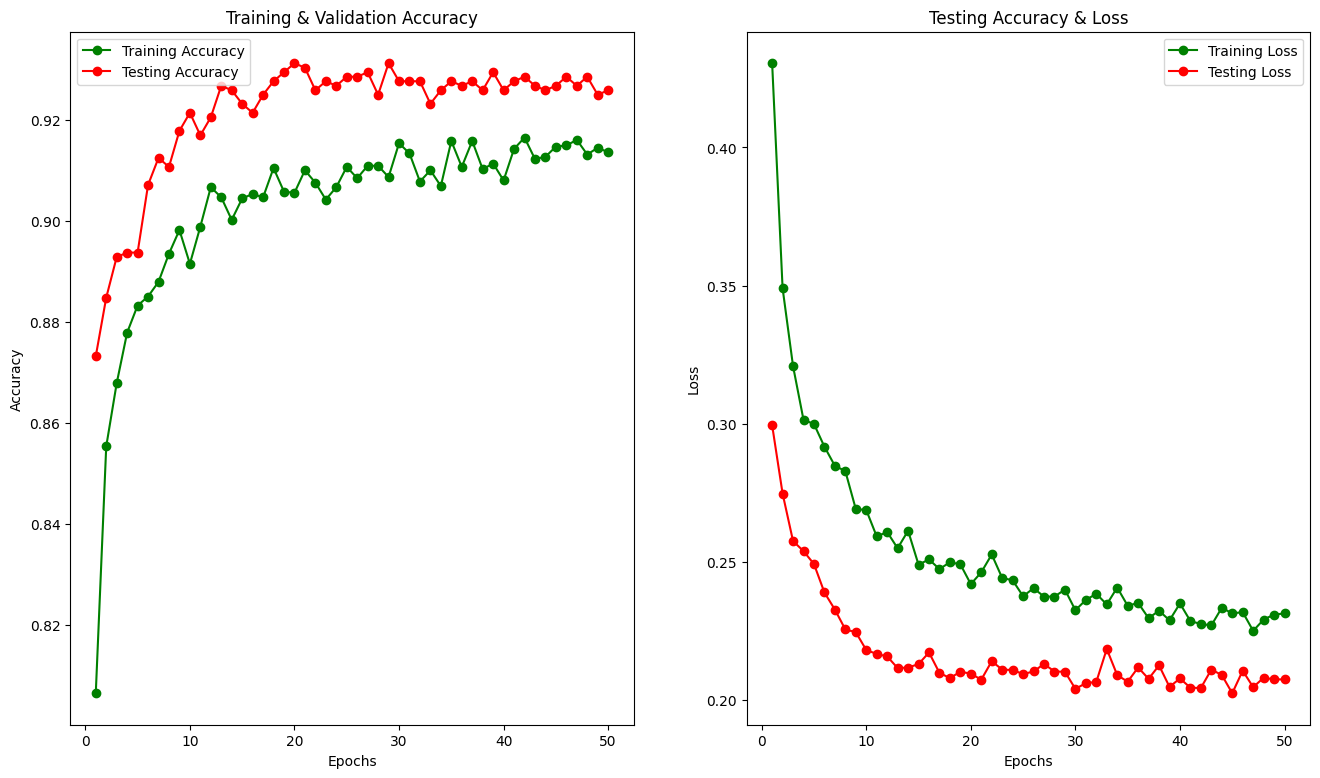

In [552]:
# Plot training and validation metrics
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 9)

ax[0].plot(epochs, train_acc, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label='Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'g-o', label='Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label='Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

**Remarks:** The plotter shows a good result and plots the loss and accuracy of the trained and test data over time, it shows that the plots are almost parallel with each other but there are stil gaps in between therefore improvement in decreasing the loss could still be an option, as different parameters are being change in the model to either improve or worsen the model.

#**Summary, Conclusion, and Lesson Learned**

In sumamry building and applying the multilayer perceptron, will help us understand more of machine learning, and be applied trough aspects of engineering and analysis, benchmarking both of the models (SKlearn and TensorFlow) I observed that good are pretty good algorithms in terms of integration SKlearn is I find easy to understand, compare to TensorFlow, however in terms of handling data TensorFlow shows greater accuracy over SKlearn, and I learned that by building and applying MLP will help me gain knowledge and skill to apply in technology that has data acquisition system and data engineering.